## Lab 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Functions:

In [3]:
def init_weights(n_neurons):
    return np.zeros((n_neurons, n_neurons))

def activation(x):
    return np.where(x >= 0, 1, -1)

def store_pattern(weights, pattern):
    # Update the weights matrix
    weights += np.outer(pattern, pattern)
    return weights

def update_network(x, W, do_print=False):
    N = len(x)  # Number of neurons
    iterations = 0
    while True:
        # Apply the update rule
        x_new = activation(W.dot(x))
        
        # Check for convergence
        if np.array_equal(x, x_new):
            if do_print:
                print("Converged in {} iterations".format(iterations))
            return x
        
        if iterations > 1000:
            print("Did not converge")
            return x
        x = x_new
        iterations+=1
        
def find_attractors(W):
    N = W.shape[0]
    attractors = []
    
    for i in range(2**N):
        initial_state = np.array([int(bit) for bit in np.binary_repr(i, width=N)])
        attractor = update_network(initial_state, W)
        
        is_new_attractor = True
        for existing_attractor in attractors:
            if np.array_equal(attractor, existing_attractor):
                is_new_attractor = False
                break
        
        if is_new_attractor:
            attractors.append(attractor)
    
    return attractors

Init hopfield weights

In [76]:
# init patterns
x1 = np.array([-1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0])
x2 = np.array([-1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0])
x3 = np.array([-1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0])

# store patterns
W = init_weights(n_neurons=8)
W = store_pattern(W, x1)
W = store_pattern(W, x2)
W = store_pattern(W, x3)

# check recall
x1_recall = update_network(x1, W)
x2_recall = update_network(x2, W)
x3_recall = update_network(x3, W)

# Check if the recalled patterns match the stored patterns
print("Pattern x1 recall: ", np.array_equal(x1, x1_recall))
print("Pattern x2 recall: ", np.array_equal(x2, x2_recall))
print("Pattern x3 recall: ", np.array_equal(x3, x3_recall))

Pattern x1 recall:  True
Pattern x2 recall:  True
Pattern x3 recall:  True


### 3.1 Convergence and attractors

In [ ]:
# distored patterns
import numpy as np
x1d = np.array([1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0])
x2d = np.array([1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0])
x3d = np.array([1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0])

# check recall
x1d_recall = update_network(x1d, W)
x2d_recall = update_network(x2d, W)
x3d_recall = update_network(x3d, W)

print(x2d.astype(int))
print(x2d_recall)
print(x2.astype(int))

# Check if the recalled patterns match the stored patterns
print("Pattern x1 recall: ", np.array_equal(x1, x1d_recall))
print("Pattern x2 recall: ", np.array_equal(x2, x2d_recall))
print("Pattern x3 recall: ", np.array_equal(x3, x3d_recall))

How many attractors:

In [ ]:
# Find attractors
attractors = find_attractors(W)

print("Number of attractors:", len(attractors))
for attractor in attractors:
    print("Attractor:", attractor)

More than half is wrong

In [77]:
x1dd = np.array([-1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0])
x1dd_recall = update_network(x1dd, W, do_print=True)
print("Pattern x1 recall: ", np.array_equal(x1, x1dd_recall))


Converged in 1 iterations
Pattern x1 recall:  False


###  3.2 Sequential Update

Functions

In [4]:
def load_data(path):
    with open(path) as f:
        for row in f:
            data = row.strip().split(",")
    f.close()

    for i, d in enumerate(data):
        data[i] = float(d)

    pictures = []
    for i in range(len(data)):
        if i % 1024 == 0:
            pic = []
        pic.append(data[i])
        if (i+1) % 1024 == 0:
            pictures.append(np.array(pic))
    return pictures

def show_pict(array):
    image = array.reshape((32, 32))
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

Load the data

In [5]:
pictures = load_data("data/pict.dat")
p1 = pictures[0]
p2 = pictures[1]
p3 = pictures[2]
p4 = pictures[3]
p5 = pictures[4]
p6 = pictures[5]
p7 = pictures[6]
p8 = pictures[7]
p9 = pictures[8]
p10 = pictures[9]
p11 = pictures[10]
# show_pict(p8)

Check the first three patterns are stable

In [6]:
W = init_weights(n_neurons=1024)
W = store_pattern(W, p1)
W = store_pattern(W, p2)
W = store_pattern(W, p3)

# check recall
p1_recall = update_network(p1, W)
p2_recall = update_network(p2, W)
p3_recall = update_network(p3, W)

# Check if the recalled patterns match the stored patterns
print("Pattern p1 recall: ", np.array_equal(p1, p1_recall))
print("Pattern p2 recall: ", np.array_equal(p2, p2_recall))
print("Pattern p3 recall: ", np.array_equal(p3, p3_recall))

Pattern p1 recall:  True
Pattern p2 recall:  True
Pattern p3 recall:  True


Can the network complete a degraded pattern? Try the pattern p10, which
is a degraded version of p1, or p11 which is a mixture of p2 and p3.

In [ ]:
p10_recall = update_network(p10, W)
p11_recall = update_network(p11, W)
print("Pattern p10 recall: ", np.array_equal(p1, p10_recall))
print("Pattern p11 recall: ", np.array_equal(p2, p11_recall))
print("Pattern p11 recall: ", np.array_equal(p3, p11_recall))
# show_pict(p1)
# show_pict(p10)
show_pict(p2)
show_pict(p3)
show_pict(p11)
show_pict(p11_recall)

What happens if we select units randomly?

In [42]:
def update_network_random(x, W, do_print=False):
    N = len(x)  # Number of neurons
    iterations = 0
    num_changes = 1  # Number of changes in the state
    
    while num_changes > 0:
        num_changes = 0
        indices = np.random.permutation(N)  # Randomly permute the indices
        
        for i in indices:
            x_i_new = activation(W[i].dot(x))
            
            if x_i_new != x[i]:
                x[i] = x_i_new
                num_changes += 1
        
            iterations += 1
            # if iterations % 200 == 0:
            #     show_pict(x)
        
        # Check for convergence
        if num_changes == 0:
            if do_print:
                print("Converged in {} iterations".format(iterations))
            return x
        
        if iterations > 100000:
            print("Did not converge within 100000 iterations")
            return x

In [ ]:
# show_pict(p10)
p11_recall = update_network_random(np.copy(p11), W, True)
# show_pict(p10_recall)
print("Pattern p11 recall: ", np.array_equal(p2, p11_recall))
print("Pattern p11 recall: ", np.array_equal(p3, p11_recall))

### Energy

In [21]:
import numpy as np

def energy(x, W):
    return -np.sum(np.dot(x, np.dot(W, x)))

def update_network_energy(x, W, do_print=False):
    N = len(x)  
    iterations = 0
    energies = []
    while True:
        indices = np.random.permutation(N)  
        num_changes = 0  
        
        for i in indices:
            x_i_new = activation(W[i].dot(x))
            
            if x_i_new != x[i]:
                x[i] = x_i_new
                num_changes += 1

            # Calculate energy
            e = energy(x, W)
            energies.append(e)
            iterations += 1
        
        # Check for convergence
        if num_changes == 0:
            if do_print:
                print("Converged in {} iterations".format(iterations))
            return x,energies
        
        if iterations > 100000:
            print("Did not converge within 100000 iterations")
            return x, energies
        
        if do_print:
            print("Energy at iteration {}: {}".format(iterations, e))

In [9]:
p1_recall, e1 = update_network_energy(np.copy(p1), W, True)
p2_recall, e2 = update_network_energy(np.copy(p2), W, True)
p3_recall, e3= update_network_energy(np.copy(p3), W, True)
p10_recall, e10= update_network_energy(np.copy(p10), W, True)
p11_recall, e11= update_network_energy(np.copy(p11), W, True)

print(e1[-1])
print(e2[-1])
print(e3[-1])
print("Pattern p1 recall: ", np.array_equal(p1, p1_recall))
print("Pattern p2 recall: ", np.array_equal(p2, p2_recall))
print("Pattern p3 recall: ", np.array_equal(p3, p3_recall))
print("Pattern p10 recall: ", np.array_equal(p1, p10_recall))
print("Pattern p11 recall: ", np.array_equal(p3, p11_recall))


Converged in 1024 iterations
Converged in 1024 iterations
Converged in 1024 iterations
Energy at iteration 1024: -1473936.0
Converged in 2048 iterations
Energy at iteration 1024: -1394864.0
Energy at iteration 2048: -1497344.0
Converged in 3072 iterations
-1473936.0
-1398416.0
-1497344.0
Pattern p1 recall:  True
Pattern p2 recall:  True
Pattern p3 recall:  True
Pattern p10 recall:  True
Pattern p11 recall:  True


2048


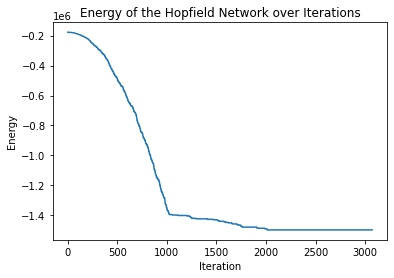

In [11]:
print(len(e10))
plt.plot(e11)
plt.xlabel('Iteration') # or 'Time Step' if that's more appropriate
plt.ylabel('Energy')
plt.title('Energy of the Hopfield Network over Iterations')
plt.show()

Random Weights and starting state

In [ ]:
N=1024
W = np.random.normal(0, 1, (N, N))

# Create an arbitrary starting state
x = np.random.choice([-1, 1], size=N)

# Update the network using random unit selection
updated_state = update_network_energy(x, W, do_print=True)

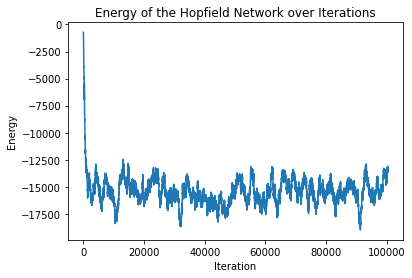

In [18]:
plt.plot(updated_state[1])
plt.xlabel('Iteration') # or 'Time Step' if that's more appropriate
plt.ylabel('Energy')
plt.title('Energy of the Hopfield Network over Iterations')
plt.show()

Symmetric Weights

In [ ]:
N=1024
W = np.random.normal(0, 1, (N, N))
W = 0.5 * (W + W.T)
x = np.random.choice([-1, 1], size=N)

# Update the network using random unit selection
updated_state = update_network_energy(x, W, do_print=True)
plt.plot(updated_state[1])
plt.xlabel('Iteration') # or 'Time Step' if that's more appropriate
plt.ylabel('Energy')
plt.title('Energy of the Hopfield Network over Iterations')
plt.show()

### Distortion Resistance

In [11]:
def init_weights(n_neurons):
    return np.zeros((n_neurons, n_neurons))

def activation(x):
    return np.where(x >= 0, 1, -1)

def store_pattern(weights, pattern):
    # Update the weights matrix
    weights += np.outer(pattern, pattern)
    return weights

def update_network(x, W, do_print=False):
    N = len(x)  # Number of neurons
    iterations = 0
    while True:
        # Apply the update rule
        x_new = activation(W.dot(x))
        
        # Check for convergence
        if np.array_equal(x, x_new):
            # if do_print:
            #     print("Converged in {} iterations".format(iterations))
            return x
        
        if iterations > 1000:
            print("Did not converge")
            return x
        x = x_new
        iterations+=1
        
def find_attractors(W):
    N = W.shape[0]
    attractors = []
    
    for i in range(2**N):
        initial_state = np.array([int(bit) for bit in np.binary_repr(i, width=N)])
        attractor = update_network(initial_state, W)
        
        is_new_attractor = True
        for existing_attractor in attractors:
            if np.array_equal(attractor, existing_attractor):
                is_new_attractor = False
                break
        
        if is_new_attractor:
            attractors.append(attractor)
    
    return attractors

def load_data(path):
    with open(path) as f:
        for row in f:
            data = row.strip().split(",")
    f.close()

    for i, d in enumerate(data):
        data[i] = float(d)

    pictures = []
    for i in range(len(data)):
        if i % 1024 == 0:
            pic = []
        pic.append(data[i])
        if (i+1) % 1024 == 0:
            pictures.append(np.array(pic))
    return pictures

def show_pict(array):
    image = array.reshape((32, 32))
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [6]:
pictures = load_data("data/pict.dat")
p1 = pictures[0]
p2 = pictures[1]
p3 = pictures[2]

W = init_weights(n_neurons=1024)
W = store_pattern(W, p1)
W = store_pattern(W, p2)
W = store_pattern(W, p3)

# check recall
p1_recall = update_network(p1, W)
p2_recall = update_network(p2, W)
p3_recall = update_network(p3, W)

# Check if the recalled patterns match the stored patterns
print("Pattern p1 recall: ", np.array_equal(p1, p1_recall))
print("Pattern p2 recall: ", np.array_equal(p2, p2_recall))
print("Pattern p3 recall: ", np.array_equal(p3, p3_recall))

Pattern p1 recall:  True
Pattern p2 recall:  True
Pattern p3 recall:  True


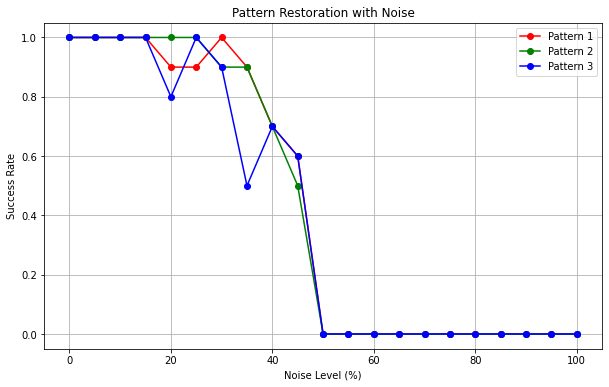

Pattern 1: 95
Pattern 2: 94
Pattern 3: 91
Other Attractors: 350


In [16]:
noise_levels = np.arange(0, 101, 5)
patterns =[p1, p2, p3]
success_rates = []

noise_levels = np.arange(0, 101, 5)
success_rates = [[] for _ in patterns]
pattern_labels = ['Pattern 1', 'Pattern 2', 'Pattern 3']
colors = ['r', 'g', 'b']
attractor_counts = [0] * (len(patterns) + 1)

for noise in noise_levels:
    for idx, pattern in enumerate(patterns):
        success_count = 0
        attractor_count = [0] * (len(patterns) + 1)
        
        for _ in range(10):  # Repeat for more reliable results
            noisy_pattern = pattern.copy()
            num_noise_bits = int(len(pattern) * noise / 100)
            noise_indices = np.random.choice(len(pattern), size=num_noise_bits, replace=False)
            noisy_pattern[noise_indices] *= -1

            restored_pattern = update_network(noisy_pattern, W)
            
            if np.array_equal(pattern, restored_pattern):
                success_count += 1
            
            # Count the attractor reached
            for attractor_idx, stored_pattern in enumerate(patterns):
                if np.array_equal(stored_pattern, restored_pattern):
                    attractor_count[attractor_idx] += 1
                    break
            else:
                attractor_count[-1] += 1
        
        success_rate = success_count / 10  # Average over multiple runs
        success_rates[idx].append(success_rate)
        
        # Accumulate attractor counts
        attractor_counts = [ac + count for ac, count in zip(attractor_counts, attractor_count)]

# Plot the success rates for each attractor
plt.figure(figsize=(10, 6))

for idx, success_rate in enumerate(success_rates):
    plt.plot(noise_levels, success_rate, marker='o', color=colors[idx], label=pattern_labels[idx])

plt.xlabel('Noise Level (%)')
plt.ylabel('Success Rate')
plt.title('Pattern Restoration with Noise')
plt.legend()
plt.grid(True)
plt.show()

# Print attractor counts
for attractor_idx, label in enumerate(pattern_labels + ['Other Attractors']):
    print("{}: {}".format(label, attractor_counts[attractor_idx]))